In [1]:
# Loading in packages
import numpy as np
import matplotlib.pyplot as plt


# Function to simulate random walks in a generalized format so it can be used in part 1 and part 2.

def simulate_random_walk(simulations, steps, pl, pr, ps):
    positions = np.zeros((simulations, steps + 1)) # init an array with dimension of sims, and steps plus 1. Each row corresponds to the postion of the walker at each time step
    for i in range(steps): # for loop to iterate though each time increment.
        steps = np.random.choice([-1, 0, 1], size=(simulations,), p=[pl, ps, pr]) # random choice correlation to walk left = -1, stop = 0, walk right = 1 with their respecting probabilities.
        positions[:, i + 1] = positions[:, i] + steps # updates the walkers position
    return positions


# General Parameters for both parts
simulations = 10000
steps = [10, 100, 1000] # steps = t because assume the person walked one step per t 





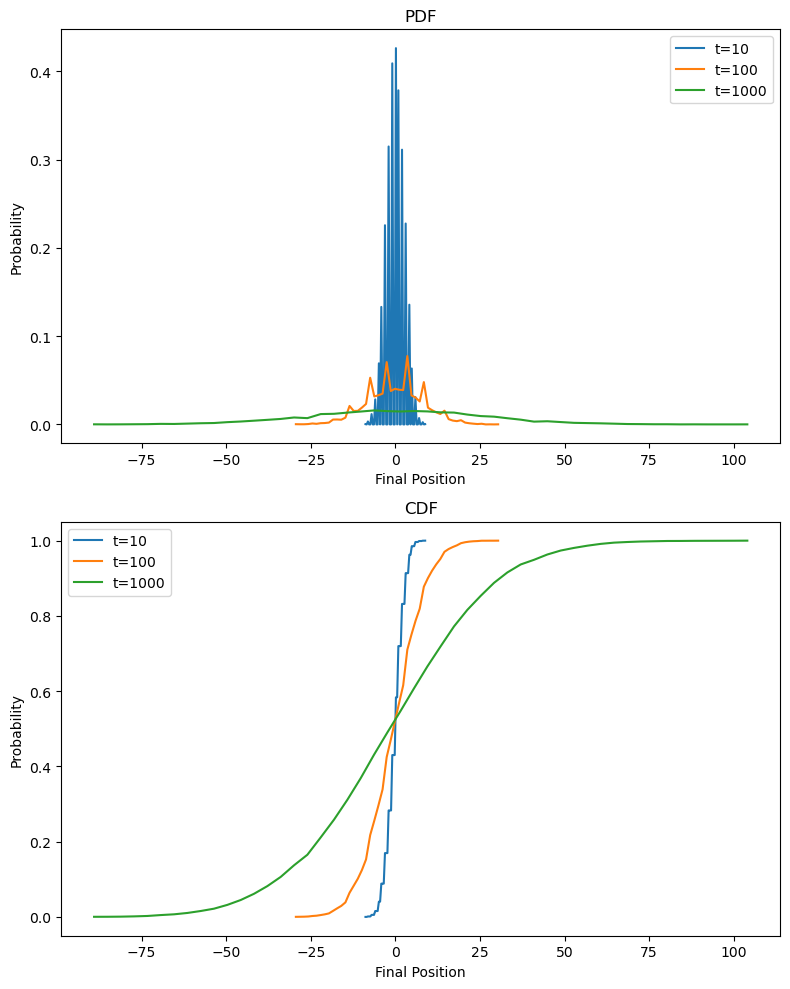

In [2]:
# Plotting PDF and CDF Part 1
# Part 2 will have less comments because it is essientally copy and paste from part 1 but changing the params of the function.
# Part-Specific parameters
pl_1 = 1/3 
pr_1 = 1/3 
ps_1 = 1/3 
# Creating Subplots so all of the data can be put on one graph
fig, axes = plt.subplots(2,1, figsize=(8,10))

# Using a for loop that will iterate by the simulations paramter so we get good data.
for t in steps: 
    positions = simulate_random_walk(simulations, t, pl_1, pr_1, ps_1) # Calling on simulate walks function

    # Calculating the PDF
    pdf, bins = np.histogram(positions[:, t], bins=50, density=True) # This nifty peice of code will select the positions of the simulations as specific intervals, which will be 10,100,1000 
    bin_centers = 0.5 * (bins[1:] + bins[:-1]) 

    # Calculating the CDF
    cdf = np.cumsum(pdf) * (bins[1] - bins[0])

    # Plotting the PDF
    axes[0].plot(bin_centers, pdf, label=f't={t}')
    
    # Plotting the CDF
    axes[1].plot(bin_centers, cdf, label=f't={t}')


# Set titles and labels in a for loop, too lazy to type it all
axes[0].set_title("PDF")
axes[1].set_title("CDF")
for ax in axes:
    ax.set_xlabel("Final Position")
    ax.set_ylabel("Probability")
    ax.legend()

# Showing the plots
plt.tight_layout()
plt.show()

For Part 1 Both the PDF and CDF graph show the expected output. If a random walker has a 1/3 chance walking left (-1), 1/3 chance resting(0), and 1/3 chance walking right (1), the highest probability of the walker to be at a certain postion would be at 0 because in simple terms walking left and right counter-act eachother and staying put is essentially reinforcing the data point before it with not visible change of the x-axis. It would make sense that the walkers normal distributions at specific timepoints would be near the starting position of his walk. As for the CDF This is also as expected because all of the timepoints converge at x = 0 and y = .6. This means that the chance of the walker being very near or at 0 is actually pretty high. 

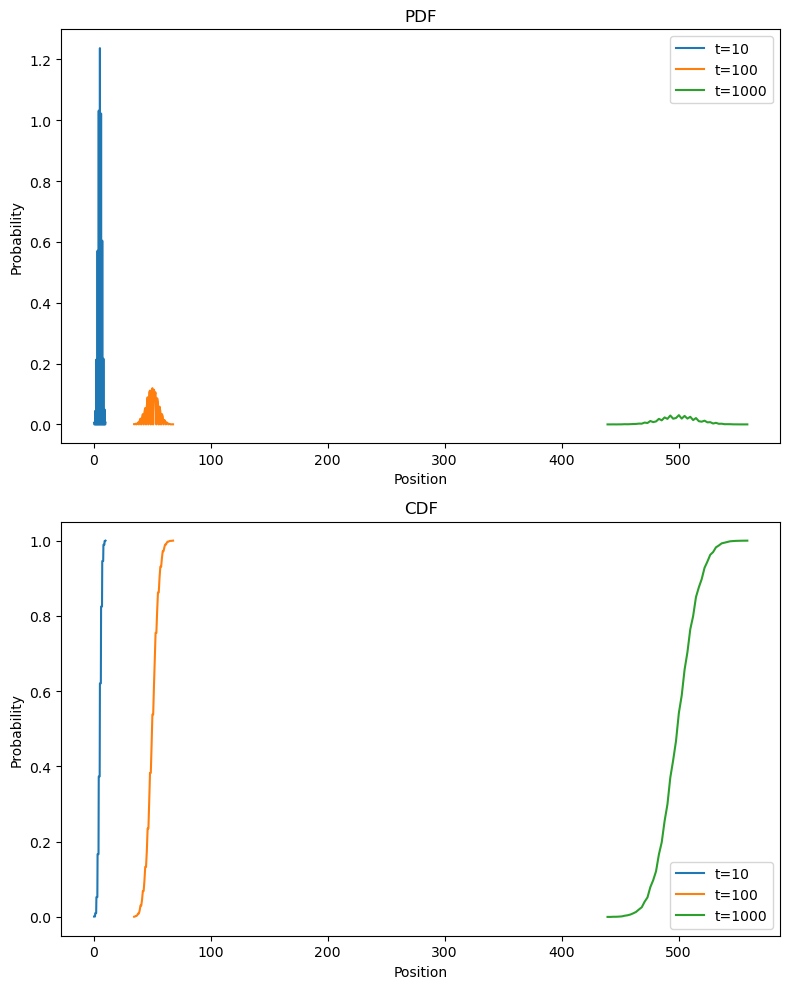

In [3]:
# Part-specific parameters: Part 2,
pl_2 = 0 
pr_2 = 1/2 
ps_2 = 1/2 
# subplotting data
fig, axes = plt.subplots(2,1, figsize=(8,10))

# Using for loop like part 2 
for t in steps: 
    positions = simulate_random_walk(simulations, t, pl_2, pr_2, ps_2) # Calling on simulate walks function with general parameters and part 1 parameters

    # PDF calculation
    pdf, bins = np.histogram(positions[:, t], bins=50, density=True) # this nifty peice of code will select the positions of the simulations as specific intervals, which will be 10,100,1000
    bin_centers = 0.5 * (bins[1:] + bins[:-1]) 

    # CDF calculation
    cdf = np.cumsum(pdf) * (bins[1] - bins[0])

    # Plot PDF
    axes[0].plot(bin_centers, pdf, label=f't={t}')

    # Plot CDF
    axes[1].plot(bin_centers, cdf, label=f't={t}')


# Set titles and labels using a for loop to label them all in one swoop
axes[0].set_title("PDF")
axes[1].set_title("CDF")
for ax in axes:
    ax.set_xlabel("Position")
    ax.set_ylabel("Probability")
    ax.legend()

# Show the plots
plt.tight_layout()
plt.show()

For part 2 both the PDF and CDF graph are showing the expected output, the process to acquiring this graph is similar to part 1, but a change in probabilities where there is a 0 chance to walk left, a 1/2 chance to walk right and 1/2 chance to rest. 


The Reason why both of these graphs are different is because of the difference in probabilities, in part 1 we allowed the walker to move left, which kind of counter-acted his walk right. In part 2 we took that out and he was only given walk right 1/2 chance and rest 1/2 chance. Now there is nothing counteracting the walkers move right, so we see this in the PDF for all time timepoints. The higher the timepoints the farther the curve from the starting postion 0.  Each mean postion(highest point on the normal distribution curve) is at 50% of t. This in contrast to part 1 where all of the curves are around postion x=0. Also an observation for all of the curves in the PDF plots, each timepoint has a different height. I think this is because with t=10 there are less chances for the walker to leave the origin so this means there is a higher probability of the walker staying near 0. in t=1000 the curve is flatter which means that there are more chances for the walker to be at various postions in t = 1000